## 📘 **Notebook 03 – Evaluation of CNN & VGG16 Model Performance**


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
import pandas as pd

In [2]:
# 📁 Paramètres globaux
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH_CNN = "models/cnn_model.h5"
MODEL_PATH_VGG = "models/vgg16_model.h5"
TEST_DIR = "data/split/test"

**🔄 Prepare test data generator**  


In [4]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 8178 images belonging to 38 classes.


**🔍 Load trained models**  


In [5]:
model_cnn = load_model(MODEL_PATH_CNN)
model_vgg = load_model(MODEL_PATH_VGG)

**📊 Generic evaluation function**  


In [6]:
def evaluate_model(model, generator, model_name="Modèle"):
    print(f"\n📊 Évaluation de {model_name}")
    scores = model.evaluate(generator, verbose=1)
    print(f"✅ Test Loss: {scores[0]:.4f}")
    print(f"✅ Test Accuracy: {scores[1]*100:.2f}%")

    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator, verbose=1), axis=1)
    class_labels = list(generator.class_indices.keys())

    print("\n📋 Rapport de classification:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"📌 Matrice de confusion - {model_name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return scores[1], y_true, y_pred, class_labels

**🔍 Evaluate model performance**  



📊 Évaluation de CNN Basique
256/256 [==============================] - 21s 61ms/step - loss: 1.4628 - accuracy: 0.5701 
✅ Test Loss: 1.4628
✅ Test Accuracy: 57.01%
256/256 [==============================] - 14s 52ms/step

📋 Rapport de classification:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00        95
                                 Apple___Black_rot       0.00      0.00      0.00        94
                          Apple___Cedar_apple_rust       1.00      0.02      0.05        42
                                   Apple___healthy       0.65      0.35      0.45       248
                               Blueberry___healthy       0.23      0.49      0.32       226
          Cherry_(including_sour)___Powdery_mildew       0.92      0.66      0.77       159
                 Cherry_(including_sour)___healthy       0.92      0.09      0.17       129
Corn_(maize

C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\User

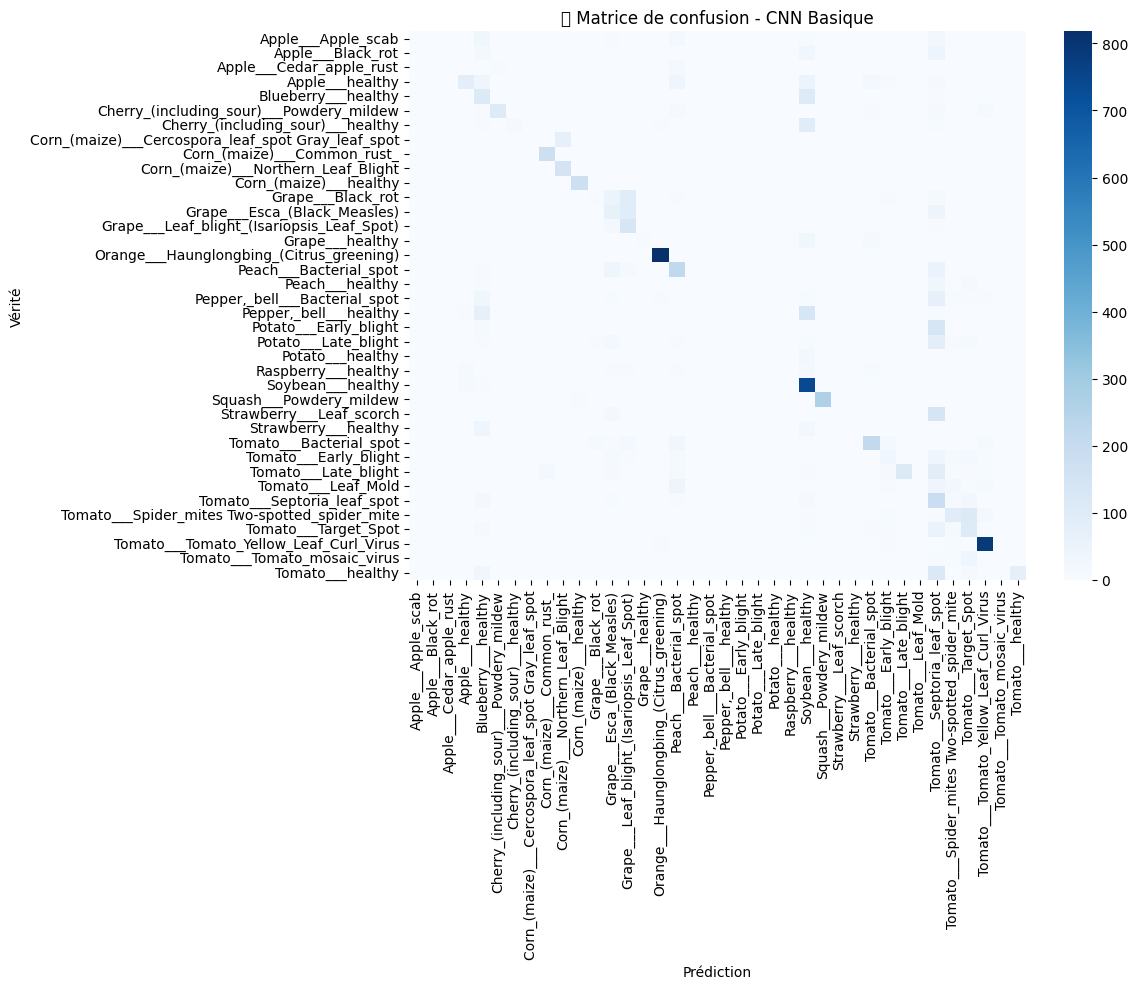


📊 Évaluation de VGG16 (Feature Extractor)
256/256 [==============================] - 64s 225ms/step - loss: 0.2765 - accuracy: 0.9090
✅ Test Loss: 0.2765
✅ Test Accuracy: 90.90%
256/256 [==============================] - 53s 207ms/step

📋 Rapport de classification:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.77      0.91      0.83        95
                                 Apple___Black_rot       0.91      0.89      0.90        94
                          Apple___Cedar_apple_rust       0.93      0.67      0.78        42
                                   Apple___healthy       0.93      0.96      0.94       248
                               Blueberry___healthy       0.87      1.00      0.93       226
          Cherry_(including_sour)___Powdery_mildew       0.99      0.93      0.96       159
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       

C:\Users\cheri\AppData\Local\Temp\ipykernel_4516\2399316425.py:23: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


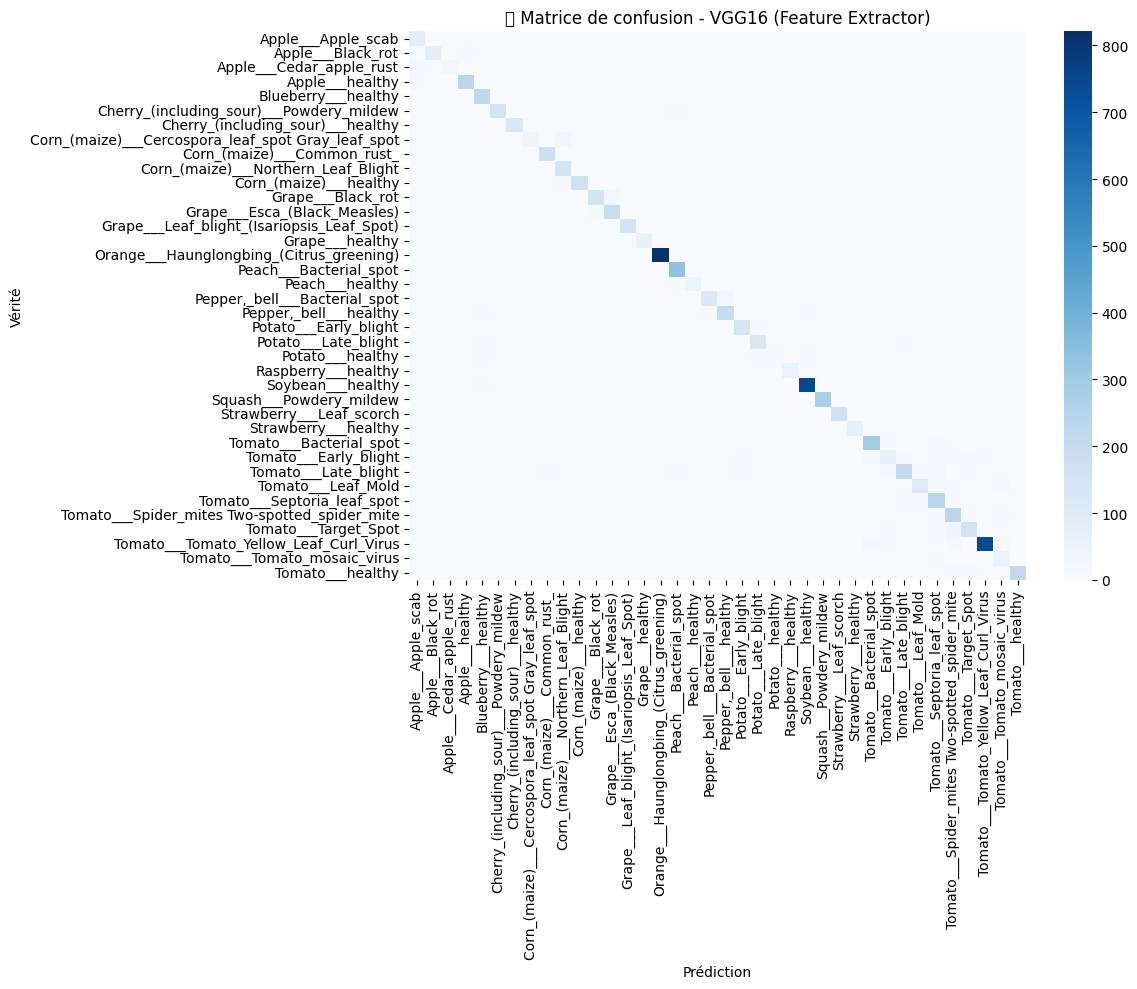

In [7]:
acc_cnn, y_true_cnn, y_pred_cnn, labels = evaluate_model(model_cnn, test_generator, "CNN Basique")
acc_vgg, y_true_vgg, y_pred_vgg, _ = evaluate_model(model_vgg, test_generator, "VGG16 (Feature Extractor)")

**📊 Compare model accuracies**  


In [8]:
print("\n🔎 Comparaison des précisions:")
comparison_df = pd.DataFrame({
    "Model": ["CNN Basique", "VGG16 (Feature Extractor)"],
    "Test Accuracy (%)": [acc_cnn * 100, acc_vgg * 100]
})
print(comparison_df)



🔎 Comparaison des précisions:
                      Modèle  Test Accuracy (%)
0                CNN Basique          57.006603
1  VGG16 (Feature Extractor)          90.902424


**🕵️ Display misclassified examples**  


In [9]:
def show_errors(generator, y_true, y_pred, class_labels, nb_errors=9):
    errors = np.where(y_true != y_pred)[0]
    print(f"\n🚨 Nombre d'erreurs : {len(errors)}")

    if len(errors) > 0:
        plt.figure(figsize=(15, 10))
        for i, idx in enumerate(errors[:nb_errors]):
            img_path = generator.filepaths[idx]
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
            plt.subplot(3, 3, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Vrai: {class_labels[y_true[idx]]}\nPrédit: {class_labels[y_pred[idx]]}")
        plt.tight_layout()
        plt.show()

**🔎 Show prediction errors**  



🚨 Nombre d'erreurs : 744


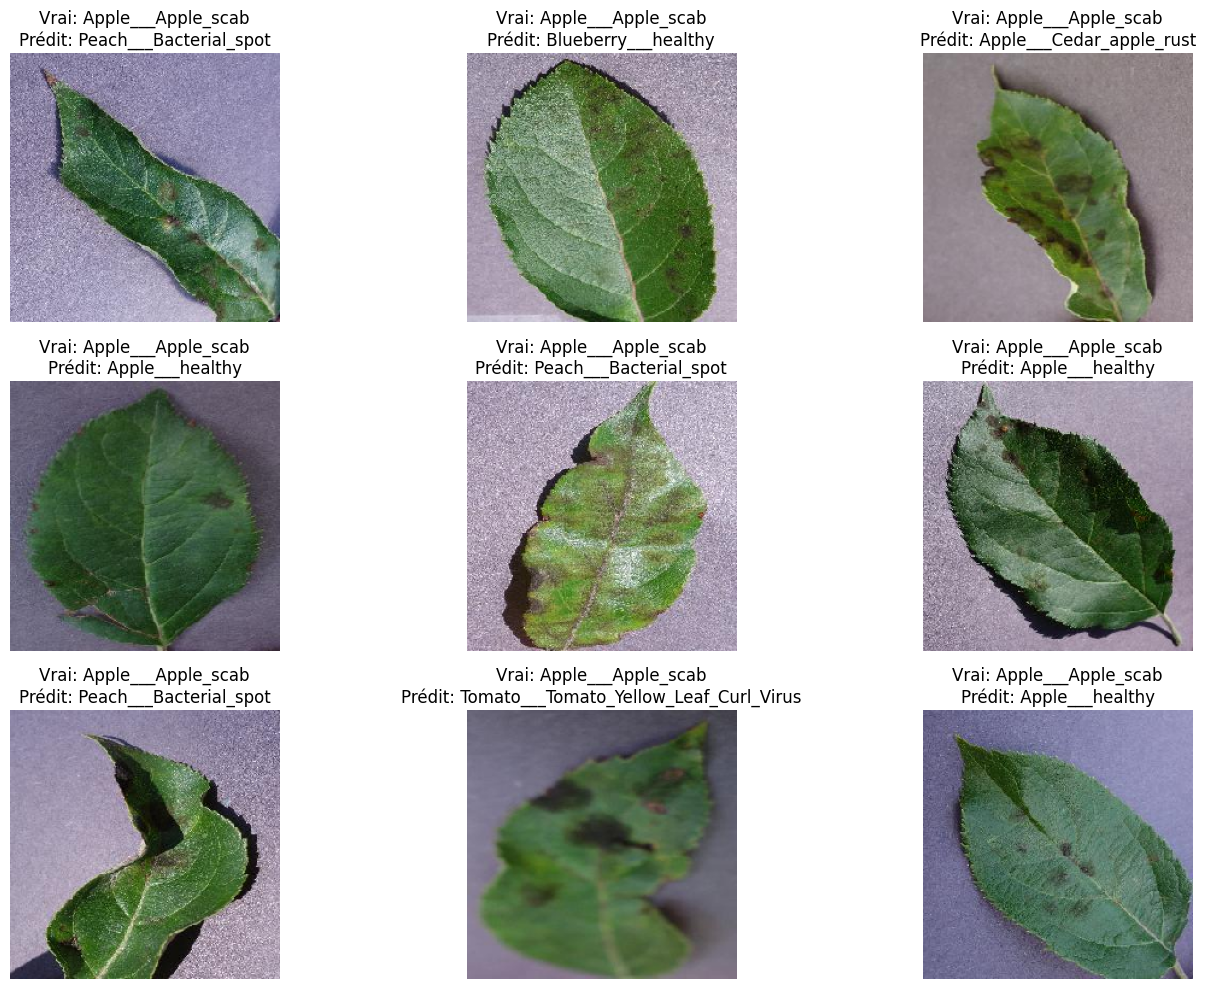

In [10]:
show_errors(test_generator, y_true_vgg, y_pred_vgg, labels)


**🕵️ Testing system**


In [12]:
# 🔍 Tester une ou plusieurs images manuellement
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"🔎 Prédit : {predicted_class}")
    plt.show()

    return predicted_class


1/1 [==============================] - 0s 33ms/step


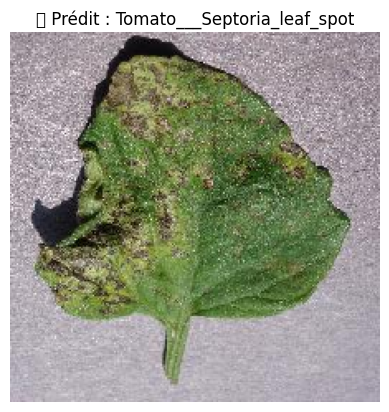

'Tomato___Septoria_leaf_spot'

In [15]:
# Exemple d’utilisation :
image_path = "data/split/test/Tomato___Septoria_leaf_spot/9eb517fe-cc34-41d9-9ab8-fb638146707a___Matt.S_CG 7737.JPG"
predict_image(image_path, model_vgg, labels)